In [1]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (env._spec.id, step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

n_actions:  2
n_features:  4
episode: 0   reward: 13


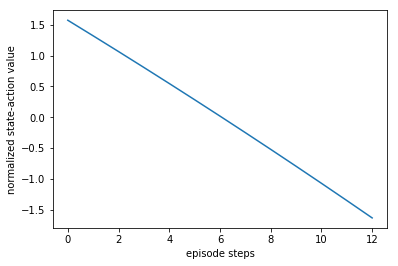

episode: 1   reward: 13
episode: 2   reward: 13
episode: 3   reward: 13
episode: 4   reward: 14
episode: 5   reward: 14
episode: 6   reward: 14
episode: 7   reward: 15
episode: 8   reward: 15
episode: 9   reward: 15
episode: 10   reward: 15
episode: 11   reward: 16
episode: 12   reward: 16
episode: 13   reward: 16
episode: 14   reward: 17
episode: 15   reward: 17
episode: 16   reward: 17
episode: 17   reward: 17
episode: 18   reward: 18
episode: 19   reward: 18
episode: 20   reward: 19
episode: 21   reward: 20
episode: 22   reward: 20
episode: 23   reward: 20
episode: 24   reward: 21
episode: 25   reward: 21
episode: 26   reward: 21
episode: 27   reward: 21
episode: 28   reward: 23
episode: 29   reward: 23
episode: 30   reward: 23
episode: 31   reward: 23
episode: 32   reward: 23
episode: 33   reward: 23
episode: 34   reward: 24
episode: 35   reward: 24
episode: 36   reward: 24
episode: 37   reward: 24
episode: 38   reward: 26
episode: 39   reward: 27
episode: 40   reward: 28
episode: 

In [ ]:
import gym
from RL_brain import PolicyGradient
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''  

DISPLAY_REWARD_THRESHOLD = 400
RENDER = False

env = gym.make('CartPole-v0')
env.seed(1)
env = env.unwrapped

n_actions = env.action_space.n
n_features = env.observation_space.shape[0]
print("n_actions: ", n_actions)
print("n_features: ", n_features)

RL = PolicyGradient(
    n_actions=n_actions,
    n_features = n_features,
    learning_rate = 0.02,
    reward_decay = 0.99
)

for i_episode in range(3000):
    observation = env.reset()
    #img = plt.imshow(env.render(mode='rgb_array')) # only call this once

    step = 0
    while True:
        """
        if RENDER:
            img.set_data(env.render(mode='rgb_array')) # just update the data
            #plt.imshow(env.render(mode='rgb_array'))
            display.display(plt.gcf())
            display.clear_output(wait=True)
            """
        action = RL.choose_action(observation)

        observation_,reward,done,info = env.step(action)

        RL.store_transition(observation,action,reward)


        if done:
            ep_rs_sum = sum(RL.ep_rs)

            if 'running_reward' not in globals():
                running_reward = ep_rs_sum
            else:
                running_reward = running_reward * 0.99 + ep_rs_sum * 0.01
            if running_reward > DISPLAY_REWARD_THRESHOLD: RENDER = True     # rendering
            print("episode:", i_episode, "  reward:", int(running_reward))

            vt = RL.learn()

            if i_episode == 0:
                plt.plot(vt)    # plot the episode vt
                plt.xlabel('episode steps')
                plt.ylabel('normalized state-action value')
                plt.show()
            break

        observation = observation_
        step += 1